# Reproducing figures in 2504.10583

Melanie A. Zaidel

This Notebook generates all of the figures presented in our paper. Figures are stored in the "figures/" directory of this repository. This file mostly contains plotting routines. For the source code related to the main physical calculations, see <code>solarLMAO.py</code>. 

As long as you have all of the requisite Python libraries installed, you shouldn't have any problems running all cells.

In [1]:
import solarLMAO as sLMAO
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from matplotlib.ticker import LogLocator, LogFormatterSciNotation
from matplotlib.patches import Rectangle
import inspect

If you'd like to see how a particular function used in this Notebook is defined, consider using the <code>inspect</code> module. Here's an example using the <code>matterAngle</code> function stored within the <code>sLMAO</code> module:

In [2]:
lines = inspect.getsource(sLMAO.matterAngle)
print(lines)

def matterAngle(n_e,E_nu):
	"""
	Returns the matter angle as a function of electron number density and neutrino energy

		Parameters:
				n_e (astropy.units.quantity.Quantity): Number density of electrons with astropy units
					Example: n_e = 1e20 * u.cm**-3

				E_nu (astropy.units.quantity.Quantity): Neutrino energy with astropy units
					Example: E_nu = 1 * u.MeV

		Returns:
			theta (numpy.float64): Matter angle in implicit units of radians.
	"""
	lamb = np.sin(2*theta_12)**2
	phi = zeta(n_e,E_nu) - np.cos(2*theta_12)
	fraction = -phi/np.sqrt(lamb + phi**2)
	trig = np.arccos(fraction)
	return 0.5*trig



If you'd like to take a look at just the Docstrings of a function, run the cell containing the function, place your mouse cursor on the name of the function, left click once, then press Shift+Tab.

Some parameters and variables are defined outside of functions and referenced globally, which you can refer to as follows for example:

In [3]:
print(sLMAO.theta_12)

33.43690087037759 deg


Set some plotting parameters. Running the next cell for the first time may take a few minutes.

Note: if your machine does not have some LaTeX/MiKTeX distribution installed (or your Anaconda distribution can't find it), attempting to use the style sheet <code>style_prof2.mplstyle</code> may fail. You may need to add LaTeX/MiKTeX to your system PATH variable.

In [4]:
cm = plt.get_cmap('jet')
plt.style.use('style_prof2.mplstyle')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

default_size = 18
plt.rcParams.update({
    'font.size': default_size,  # This sets the default font size for everything
    'font.weight': 'bold',
    'axes.titlesize': default_size,
    'axes.labelsize': default_size,
    'xtick.labelsize': default_size,
    'ytick.labelsize': default_size,
    'legend.fontsize': default_size,
    'figure.titlesize': default_size,
    'axes.labelweight': 'bold',
    'text.usetex': True,
})

figsize = 5

plt.rcParams.update({
    'axes.linewidth': 1.5,       # Set frame (spine) thickness
    'xtick.major.width': 1.5,    # Set x-axis major tick thickness
    'ytick.major.width': 1.5,    # Set y-axis major tick thickness
    'xtick.minor.width': 1,  # Set x-axis minor tick thickness
    'ytick.minor.width': 1,  # Set y-axis minor tick thickness
    'xtick.major.size': 8,     # Set x-axis major tick length
    'ytick.major.size': 8,     # Set y-axis major tick length
    'xtick.minor.size': 3,     # Set x-axis minor tick length
    'ytick.minor.size': 3,     # Set y-axis minor tick length
})


matplotlib.rcParams['figure.figsize'] = [figsize,figsize]#[10, 10] # for square canvas
matplotlib.rcParams['figure.subplot.left'] = 0
matplotlib.rcParams['figure.subplot.bottom'] = 0
matplotlib.rcParams['figure.subplot.right'] = 1
matplotlib.rcParams['figure.subplot.top'] = 1

dpi = 350
import matplotlib.ticker as ticker

# Plot of Temperature and Density Profile with Twin X

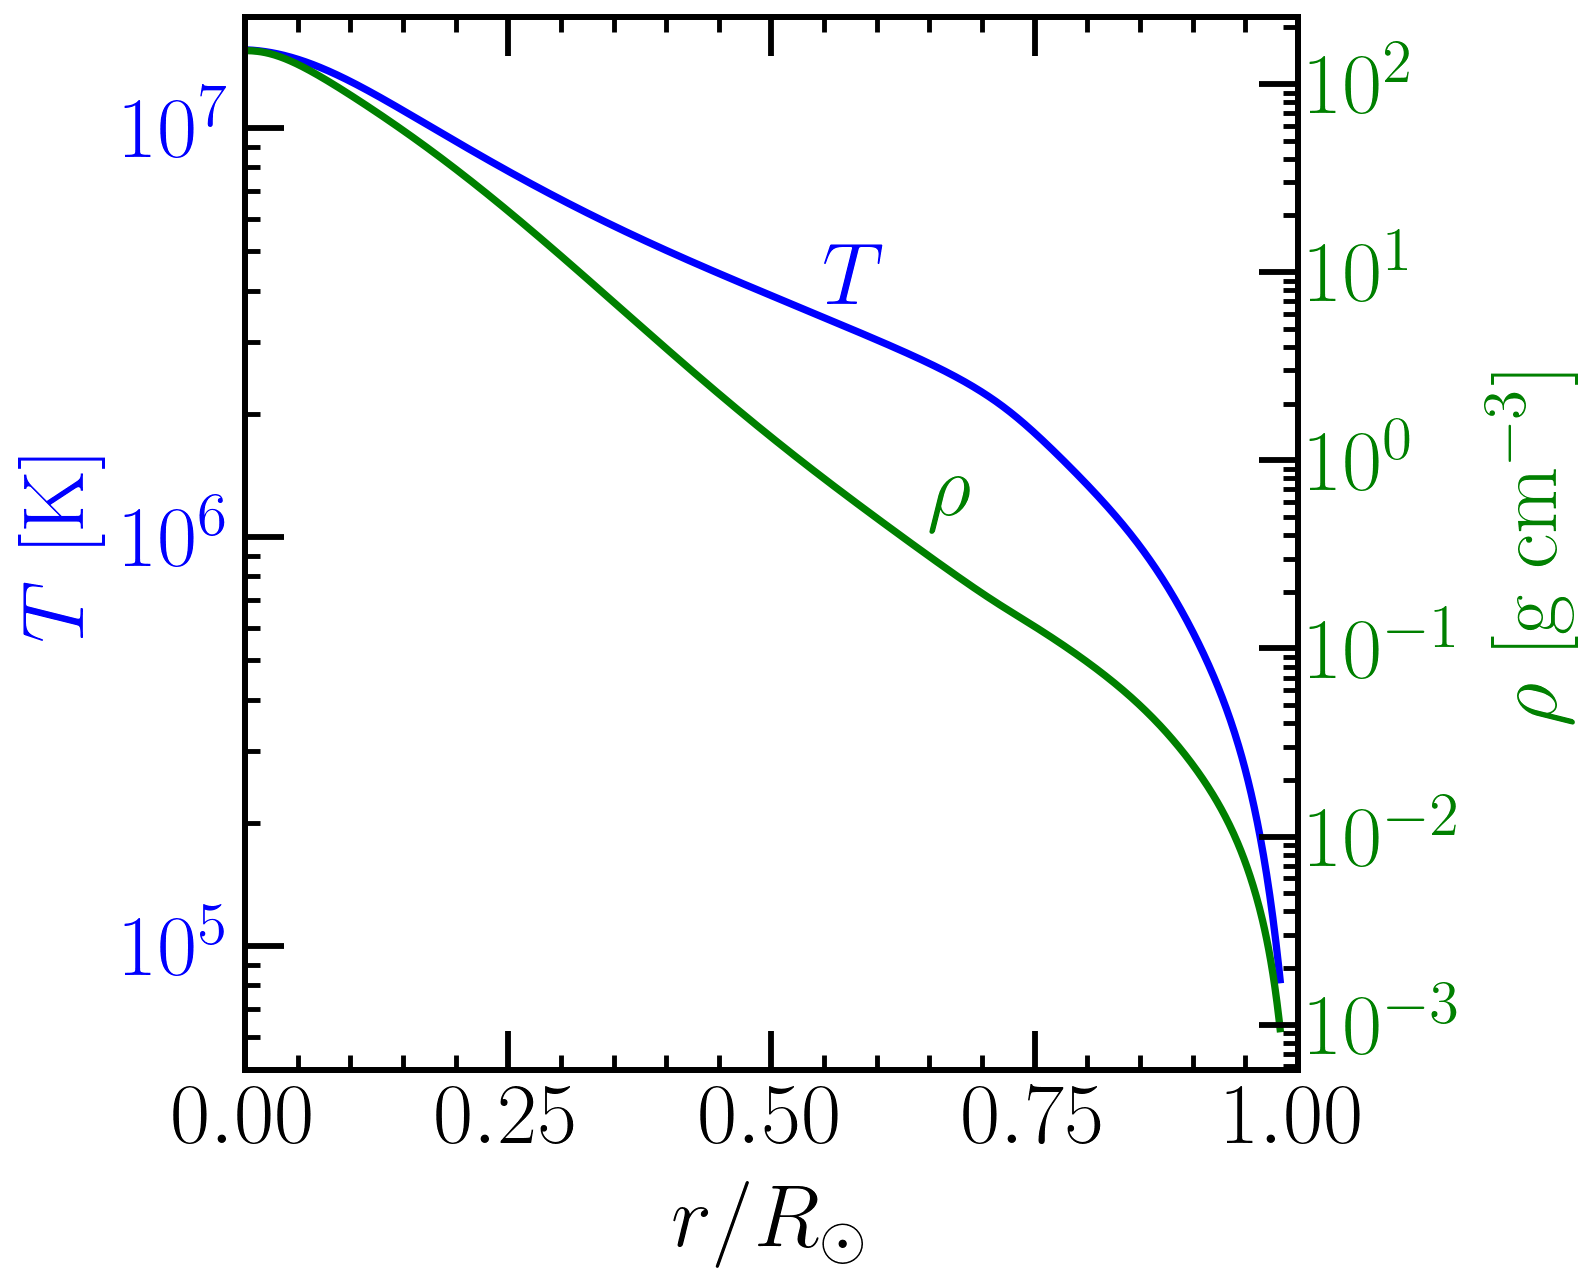

In [5]:
plt.rcParams.update({'axes.linewidth': 1.2, 'xtick.major.width': 1.2,'ytick.major.width': 1.2})
fig, ax1 = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax1.set_xlabel(r'$r/R_\odot$')
ax1.set_ylabel(r'$T$ [K]',color='blue')
ax1.set_xlim(0,1)
ax1.plot(sLMAO.SSM_r,sLMAO.SSM_T,color='blue',lw=1.5)
ax1.tick_params(axis='y',labelcolor='blue')
ax1.set_yscale('log')
ax1.set_ylim(0.6*min(sLMAO.SSM_T),1.2*max(sLMAO.SSM_T))
ax1.text(0.55,3.7e6,r'$T$',color='blue')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\rho$ [g cm$^{-3}$]',color='green')
ax2.set_ylim(0.6*min(sLMAO.SSM_rho),1.5*max(sLMAO.SSM_rho))
ax2.plot(sLMAO.SSM_r,sLMAO.SSM_rho,color='green',lw=1.5)
ax2.tick_params(axis='y',labelcolor='green')
ax2.set_yscale('log')
ax2.text(0.65,0.5,r'$\rho$',color='green')
plt.tight_layout()
ax1.set_box_aspect(1)

fig.savefig('figures/profiles.pdf')
plt.show()
plt.rcParams.update({'axes.linewidth': 1.5, 'xtick.major.width': 1.5,'ytick.major.width': 1.5})

# $^8$B Neutrino Production Zone as calculated from solar model + temperature scaling

In [6]:
df_8B = sLMAO.get8BProductionZone('data/8BZone.csv') #solar model prediction for 8B production zone
SSM_r = df_8B['Radius']
SSM_8B_zone = df_8B['Rate'] #Leave out factor of 4*np.pi*

norm_8B = sp.integrate.simpson(SSM_8B_zone,SSM_r)

zone_30 = sLMAO.generate_production_zone(30) #Scipy functions of the solar radius giving the production zone profile
zone_20 = sLMAO.generate_production_zone(20) #for more information, use inspect on sLMAO.generate_production_zone
zone_10 = sLMAO.generate_production_zone(10)

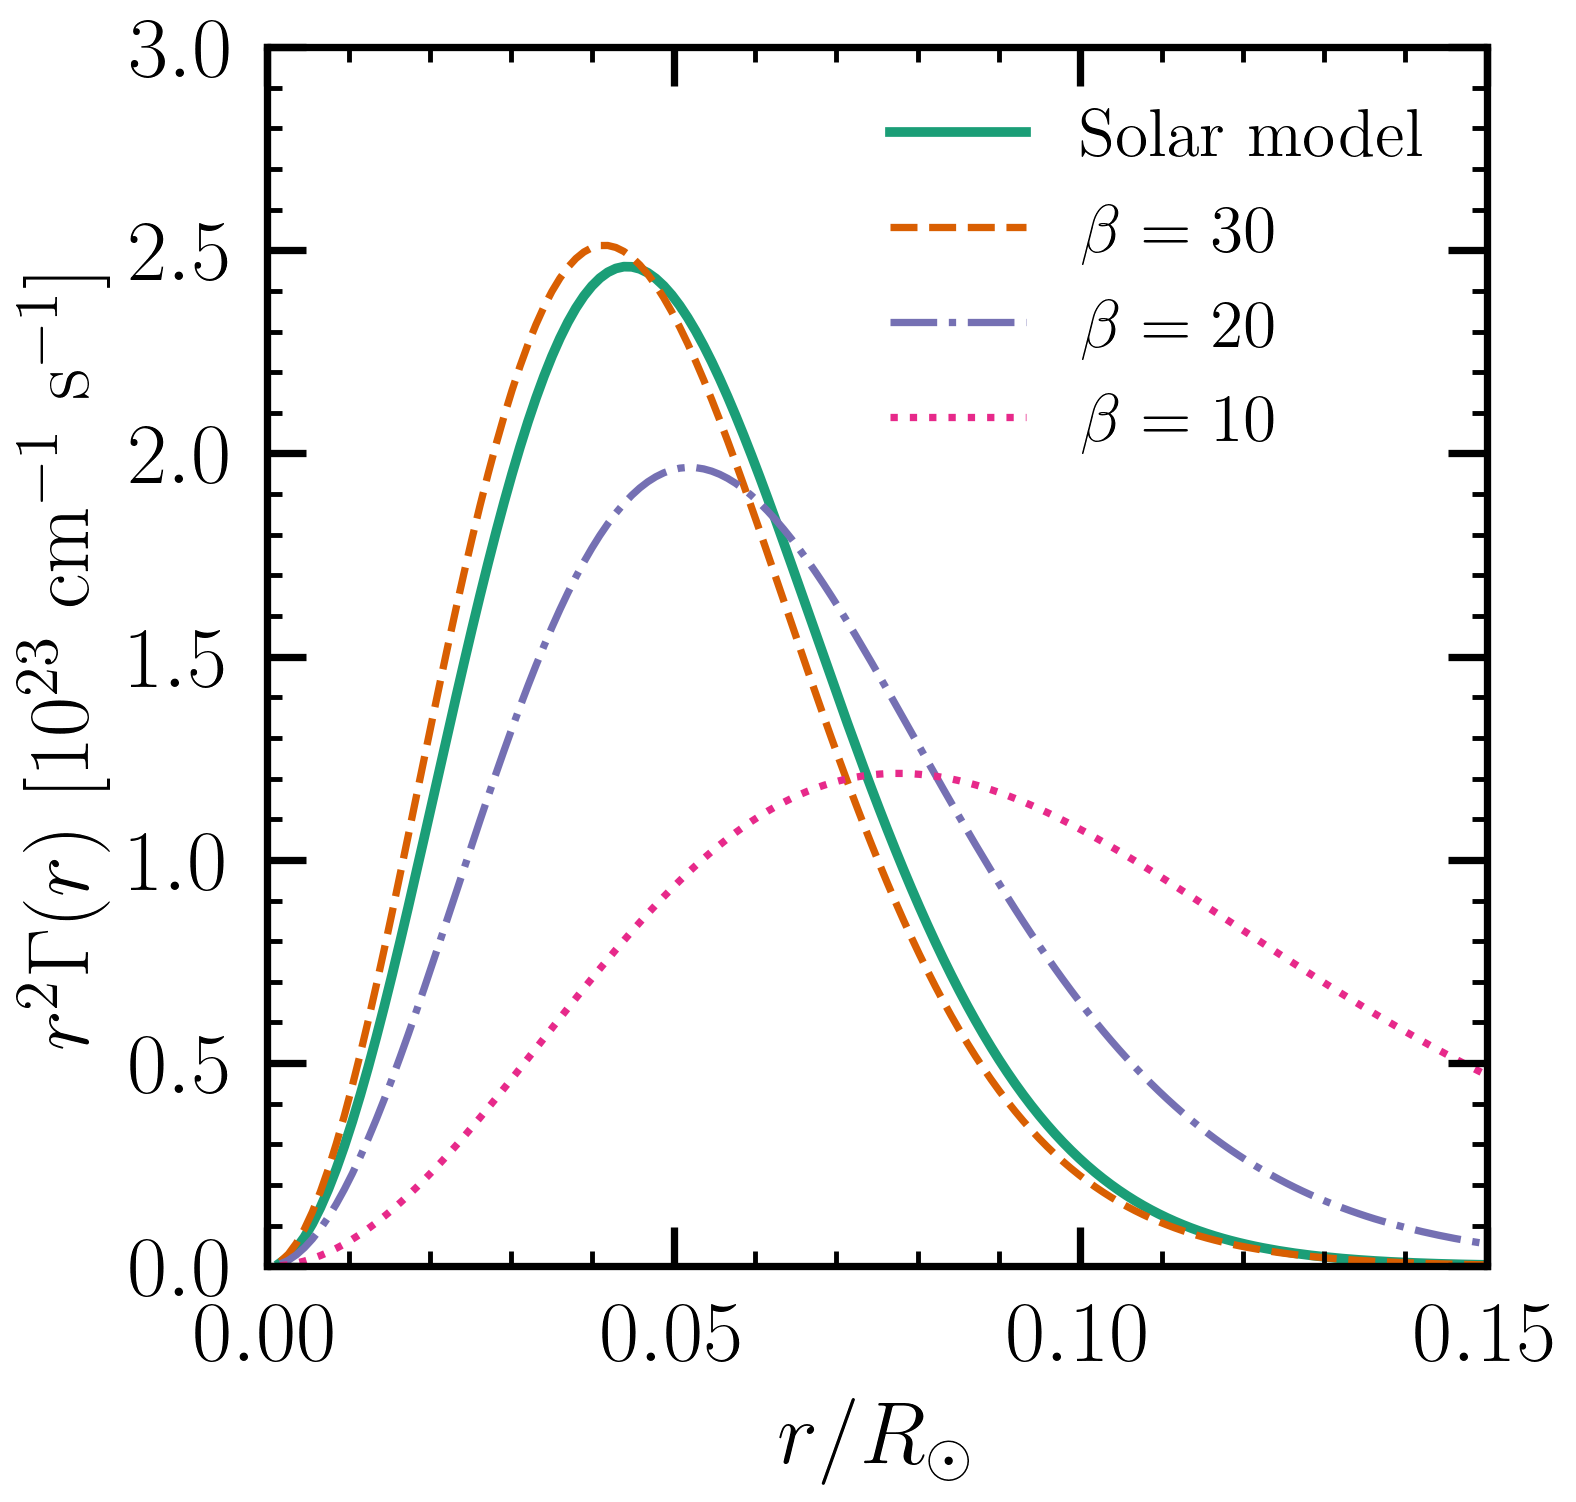

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax.set_xlabel(r'$r/R_\odot$')
ax.set_ylabel(r'$r^2 \Gamma(r)$ [$10^{23}$ cm$^{-1}$ s$^{-1}$]')
ax.plot(SSM_r,SSM_8B_zone/1e23,lw=2,label=r'Solar model',ls='solid')
ax.plot(SSM_r, zone_30(SSM_r)*norm_8B/1e23, lw=1.5,ls='dashed',label=r'$\beta = 30$')
ax.plot(SSM_r, zone_20(SSM_r)*norm_8B/1e23, lw=1.5,ls='-.',label=r'$\beta = 20$')
ax.plot(SSM_r, zone_10(SSM_r)*norm_8B/1e23, lw=1.5,ls='dotted',label=r'$\beta = 10$')
ax.set_xlim(0,0.15)
ax.set_ylim(0,3)
ax.tick_params(axis='both', pad=7)
ax.legend(fontsize=14)
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig('figures/8B_zone.pdf')
plt.show()

# Plot of Matter Angle

In [8]:
neutrino_energies = [1,5,10,15] #MeV
radii = np.linspace(np.min(sLMAO.SSM_r), 0.5, 100) #Fractions of the solar radius

all_angles = []
for E_nu in neutrino_energies:
    angles = []
    for r in radii:
        angles.append(sLMAO.matterAngle(sLMAO.n_r(r)*u.cm**-3, E_nu*u.MeV).value)
    all_angles.append(angles)

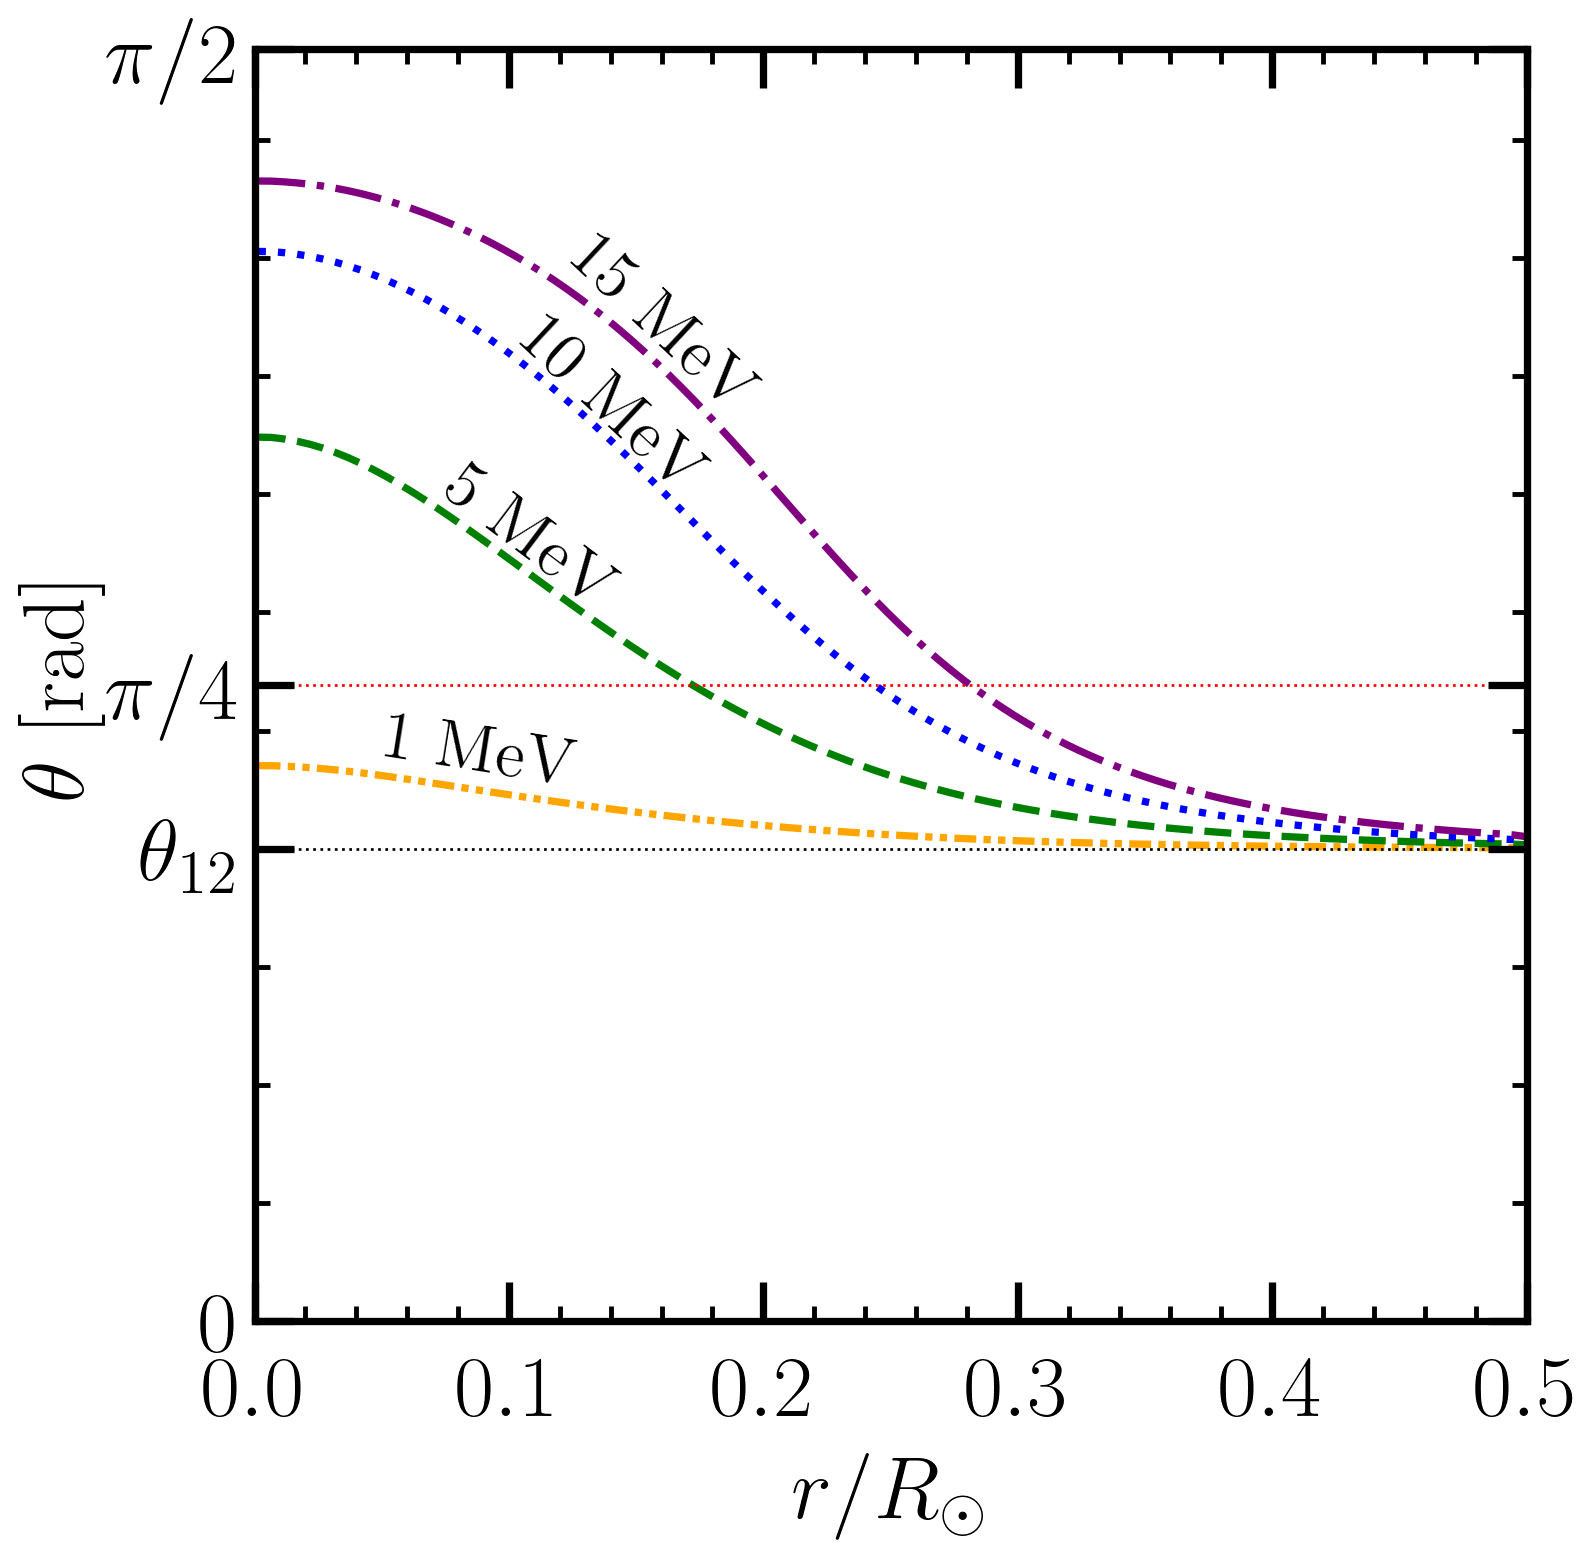

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
styles=[(0, (3, 1, 1, 1, 1, 1)),'dashed','dotted','dashdot']
colors=['orange','green','blue','purple']
labels=['1 MeV','5 MeV','10 MeV','15 MeV']

for i,thing in enumerate(all_angles):
    ax.plot(radii, thing,lw=1.5,ls=styles[i],color=colors[i])

ax.hlines((sLMAO.theta_12.to('rad')).value,0,0.5,color='black',ls='dotted')
ax.hlines(np.pi/4,0,0.5,color='red',ls='dotted')
ax.set_xlim(0,0.5)
ax.set_ylim(0,np.pi/2)
ax.set_yticks([0,(sLMAO.theta_12.to('rad')).value,np.pi/4,np.pi/2],[r'0',r'$\theta_{12}$',r'$\pi/4$',r'$\pi/2$'])
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5])
ax.tick_params(axis='x', pad=7)
ax.tick_params(axis='y', pad=3)
ax.set_xlabel(r'$r/R_\odot$')
ax.set_ylabel(r'$\theta$ [rad]',labelpad=0.25)
ax.text(0.05,0.66,'1 MeV',fontsize=14,rotation=-9)
ax.text(0.07,0.88,'5 MeV',fontsize=14,rotation=-37)
ax.text(0.1,1.02,'10 MeV',fontsize=14,rotation=-43)
ax.text(0.12,1.12,'15 MeV',fontsize=14,rotation=-43)

plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig('figures/matterAngle.pdf')
plt.show()

# Plot of Survival Probability

In [10]:
neutrino_energies = np.logspace(-2,np.log10(15),400) * u.MeV
B8_probabilities_10 = []
B8_probabilities_20 = []
B8_probabilities_30 = []

zone_30 = sLMAO.generate_production_zone(30)
zone_20 = sLMAO.generate_production_zone(20)
zone_10 = sLMAO.generate_production_zone(10)

for energy in neutrino_energies:
    B8_probabilities_10.append(sLMAO.p_ee(energy,zone_10))
    B8_probabilities_20.append(sLMAO.p_ee(energy,zone_20))
    B8_probabilities_30.append(sLMAO.p_ee(energy,zone_30))

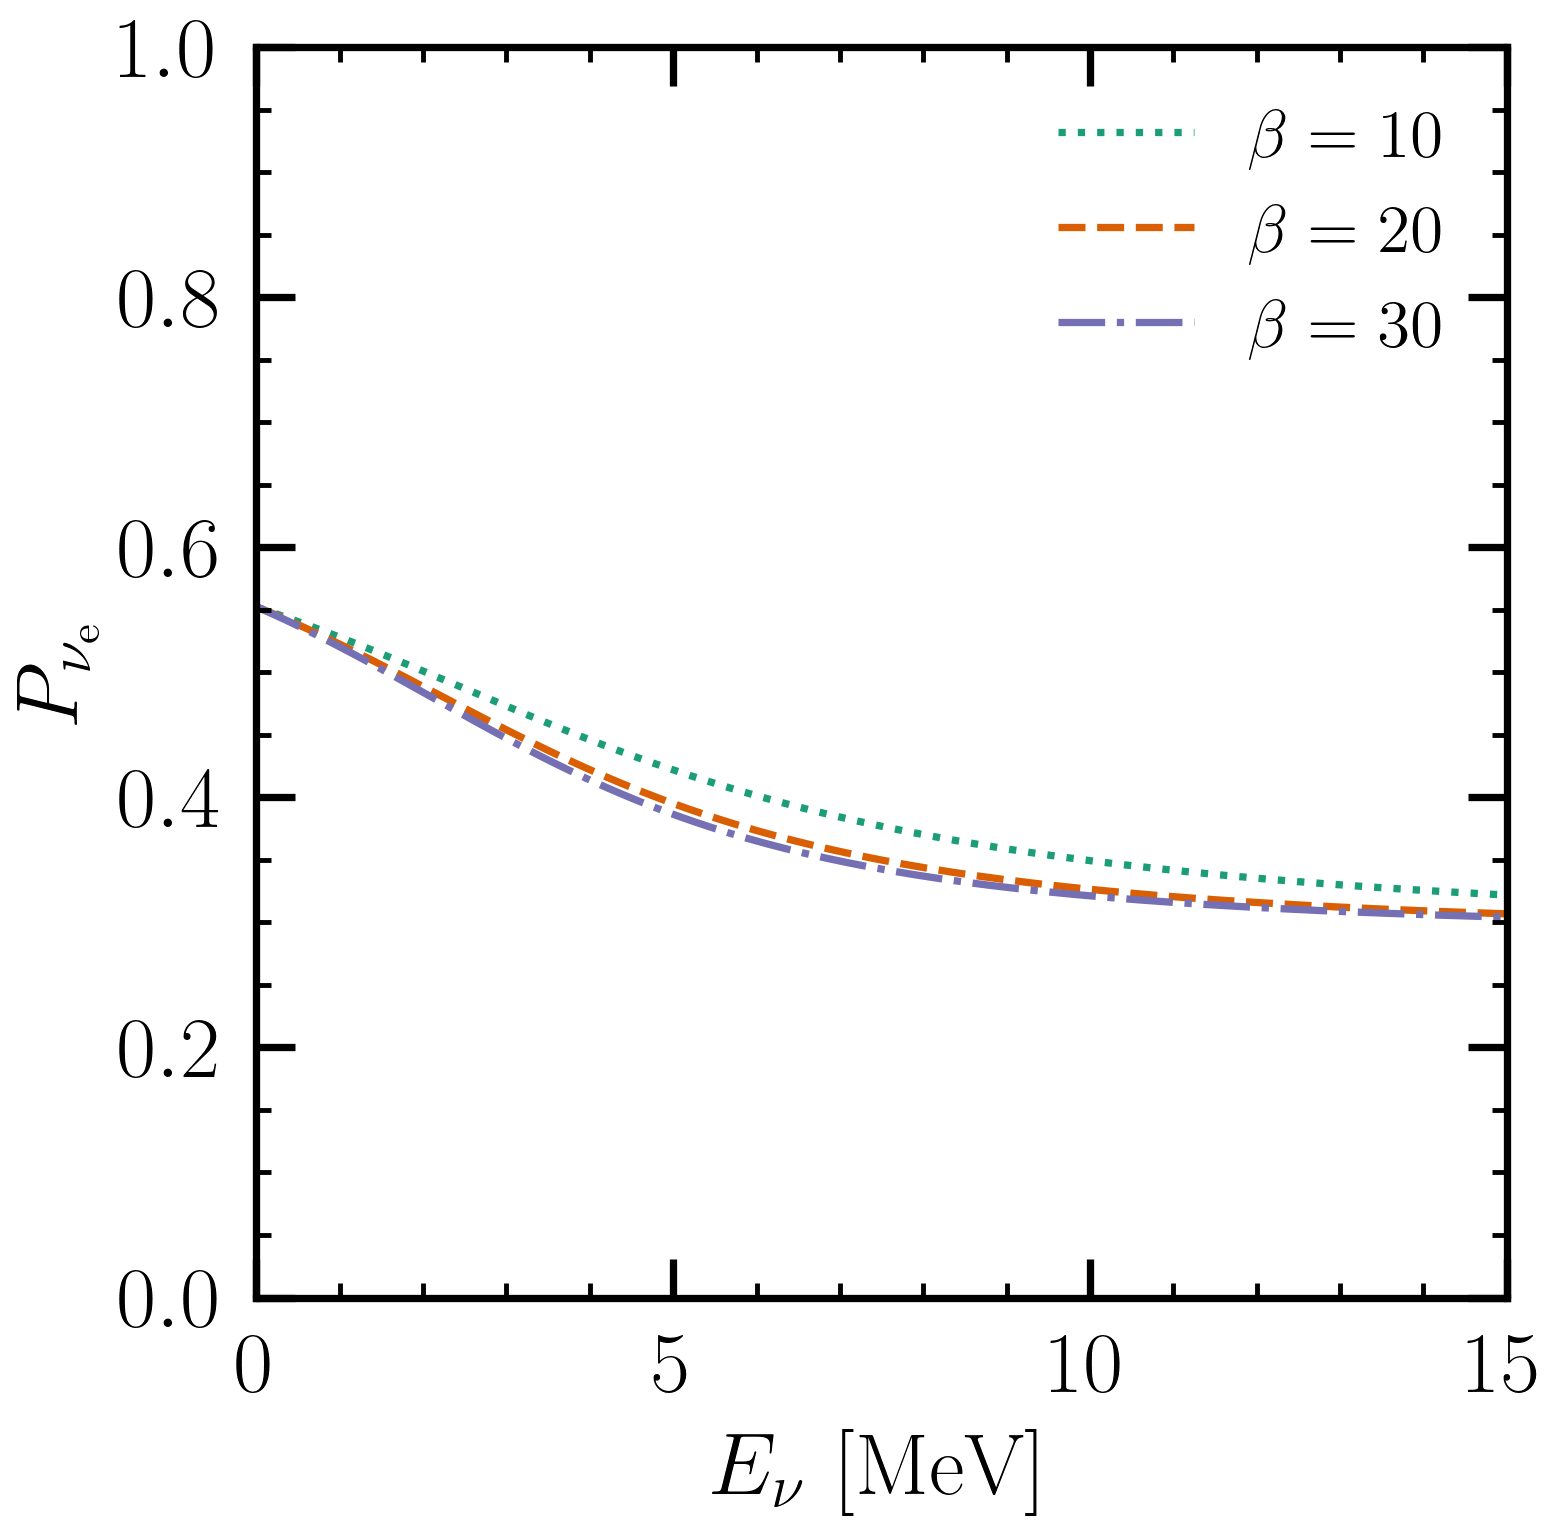

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax.plot(neutrino_energies,B8_probabilities_10,lw=1.5,label=r'$\beta = 10$',ls='dotted')
ax.plot(neutrino_energies,B8_probabilities_20,lw=1.5,label=r'$\beta = 20$',ls='dashed')
ax.plot(neutrino_energies,B8_probabilities_30,lw=1.5,label=r'$\beta = 30$',ls='dashdot')
ax.set_xlabel(r'$E_\nu$ [MeV]')
ax.set_ylabel(r'$P_{\nu_\mathrm{e}}$')
ax.set_ylim(0,1)
ax.set_xlim(0,15)
ax.legend(fontsize=14)
ax.tick_params(axis='both', pad=7)
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig('figures/Survival_probability.pdf')
plt.show()

# Plot of the SK observed event rate vs prediction from full theoretical calculation with free $\beta$

In [12]:
example_model = sLMAO.spectrum_model(beta=15,doMixing=True)

In [13]:
lines = inspect.getsource(sLMAO.spectrum_model)
print(lines)

def spectrum_model(beta,doMixing):
	"""
	Returns the theoretical prediction for the spectrum of scattered electrons in Super-K.

	Parameters:
			beta (float): Temperature scaling parameter controlling the neutrino production zone

			doMixing (boolean): Whether or not to introduce neutrino mixing physics while calculating 
								the spectrum of scattered electrons. 

								If False, survival probabilities are set to unity for all neutrino 
								energies, and the choice of beta does not enter.

								If True, survival probabilities are calculated using the MSW effect 
								and reactor mixing parameters given by KamLAND. The choice of beta
								will change the neutrino production zone and thus probabilities.

		Returns:
			final_spectrum (numpy.ndarray): 1D array containing the measured, discretized, unitful
											prediction for the spectrum of scattered electrons.
	"""
	electron_spectrum = generateSpectrum(beta,doMixing) #Generate the prompt spectrum
	measured_electr

In [14]:
theory_spectrum_10 = sLMAO.generateSpectrum(beta = 10, doMixing = True)
theory_spectrum_20 = sLMAO.generateSpectrum(beta = 20, doMixing = True)
theory_spectrum_30 = sLMAO.generateSpectrum(beta = 30, doMixing = True)
theory_spectrum_no_mixing = sLMAO.generateSpectrum(beta = 0, doMixing = False)

resolved_spectrum_10 = sLMAO.smear_numeric_sampled(theory_spectrum_10, sLMAO.recoil_energies)
resolved_spectrum_20 = sLMAO.smear_numeric_sampled(theory_spectrum_20, sLMAO.recoil_energies)
resolved_spectrum_30 = sLMAO.smear_numeric_sampled(theory_spectrum_30, sLMAO.recoil_energies)
resolved_spectrum_no_mixing = sLMAO.smear_numeric_sampled(theory_spectrum_no_mixing, sLMAO.recoil_energies)

SK_model = np.array([197.2,183.1,168.6,154.0,138.5,122.7,107.5,92.7,78.7,65.6,53.9,43.2,34.0,26.2,19.75,14.44,10.35,7.16,4.84,3.15])/(365*sLMAO.SK_widths)

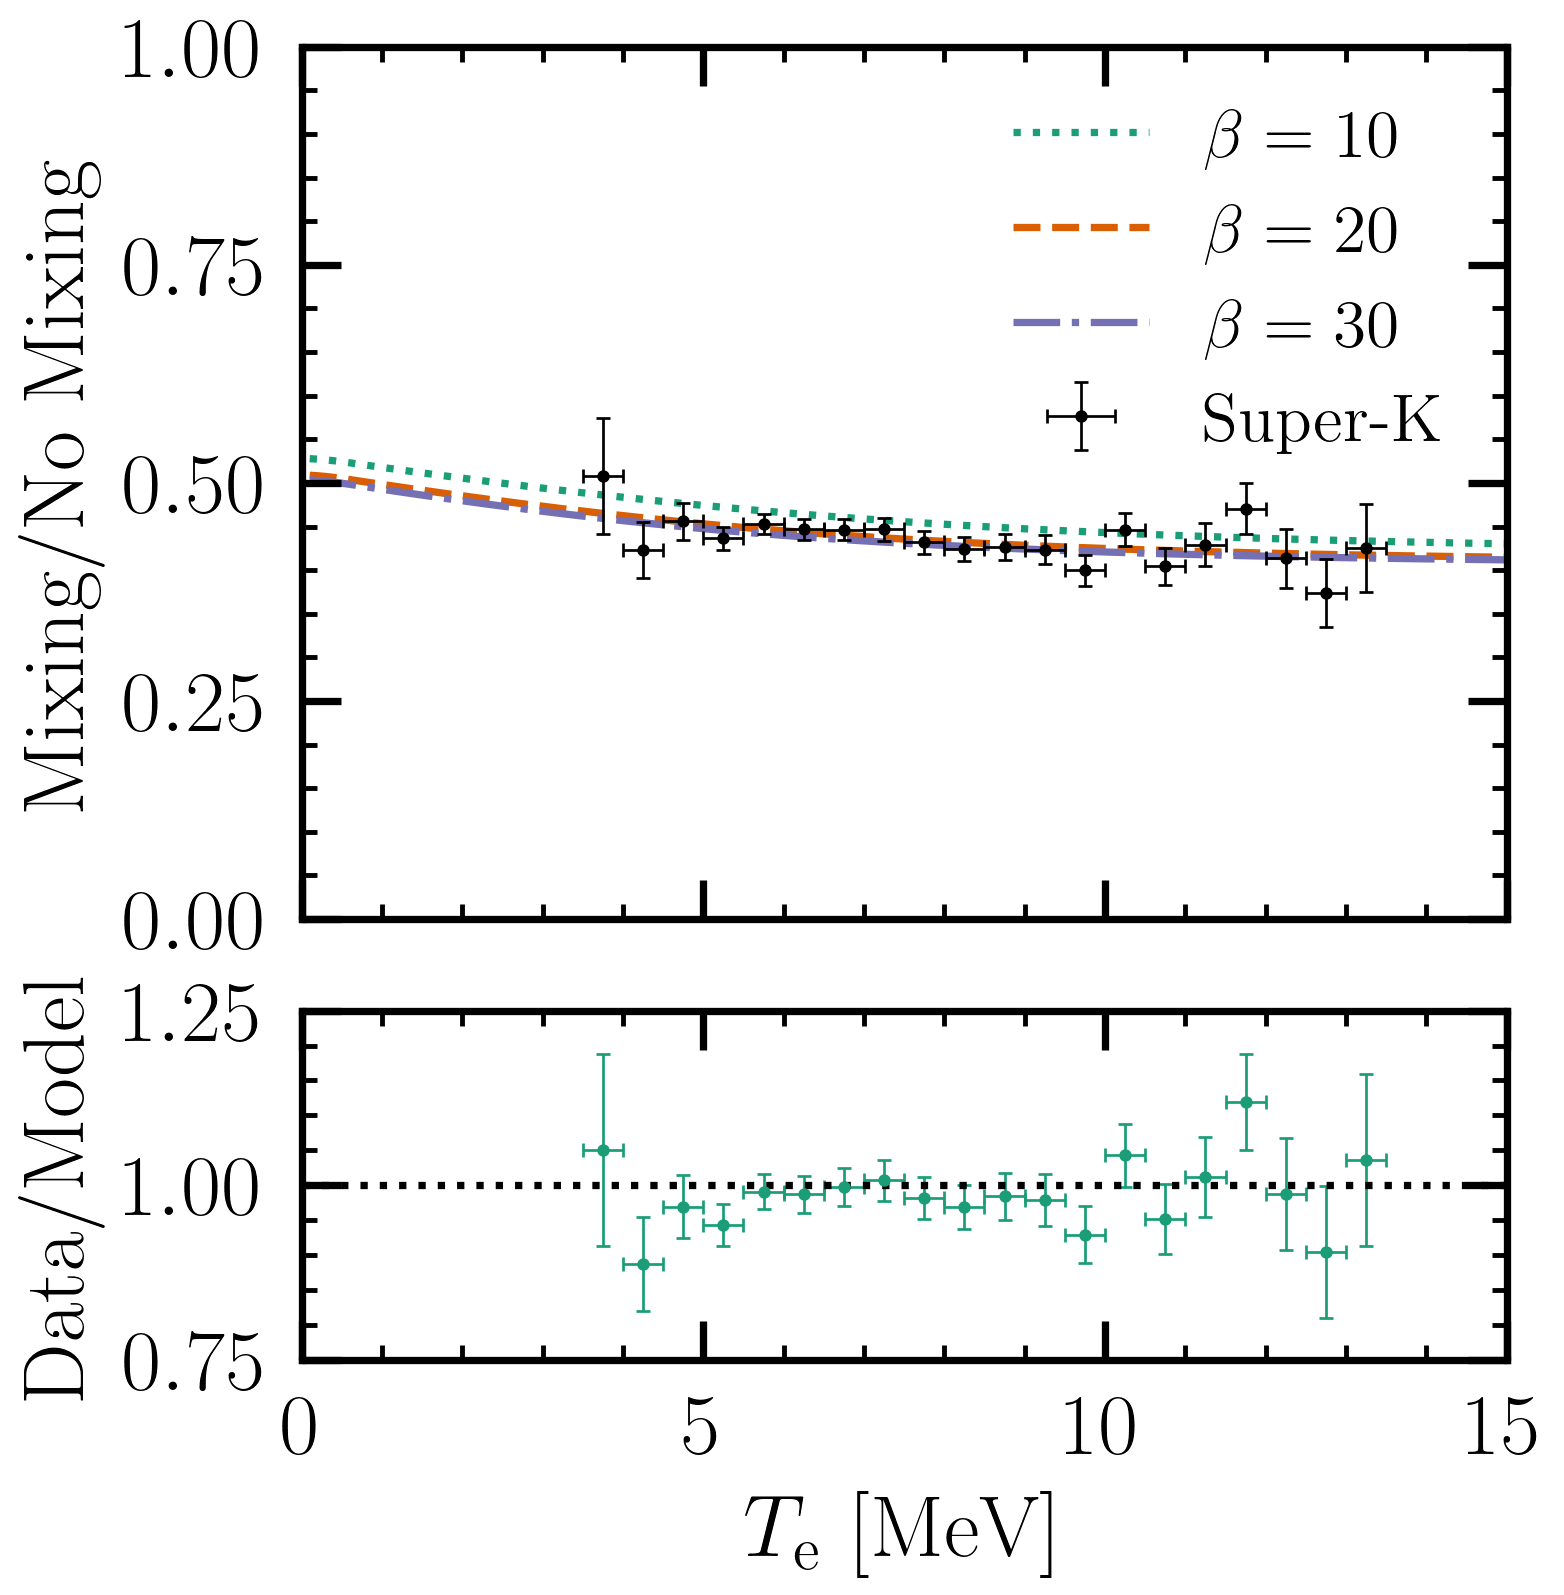

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(figsize,figsize),dpi=dpi,height_ratios=[1,0.4],sharex=True)
ax = axs[0]
ax.errorbar(sLMAO.SK_bin_center,sLMAO.SK_observed/SK_model,xerr = sLMAO.SK_widths/2, yerr = sLMAO.SK_err/SK_model,fmt='o',c='k',markersize=2,label='Super-K',zorder=4)
ax.plot(sLMAO.recoil_energies,resolved_spectrum_10/resolved_spectrum_no_mixing,lw=1.5, label=r'$\beta = 10$', ls='dotted')
ax.plot(sLMAO.recoil_energies,resolved_spectrum_20/resolved_spectrum_no_mixing,lw=1.5, label=r'$\beta = 20$', ls='dashed')
ax.plot(sLMAO.recoil_energies,resolved_spectrum_30/resolved_spectrum_no_mixing,lw=1.5, label=r'$\beta = 30$', ls='dashdot')
ax.set_ylim(0,1)
ax.set_xlim(0,15)
ax.tick_params(axis='both', pad=7)
ax.set_ylabel('Mixing/No Mixing')
ax.legend(fontsize=14)

ax = axs[1]
ax.errorbar(sLMAO.SK_bin_center,sLMAO.SK_observed/example_model,xerr = sLMAO.SK_widths/2, yerr = sLMAO.SK_err/example_model,fmt='o',markersize=2)
ax.hlines(1.0,0,20,ls='dotted',lw=1.5,color='k')
ax.set_ylim(0.75,1.25)
ax.set_xlim(0,15)
ax.set_ylabel("Data/Model")
ax.set_xlabel(r"$T_\mathrm{e}$ [MeV]")
ax.tick_params(axis='both', pad=7)
plt.tight_layout()
#ax.set_box_aspect(1)
plt.subplots_adjust(wspace=0, hspace=0.15)
fig.savefig('figures/observation_per_theory.pdf')
plt.show()

# Fitting $\beta$

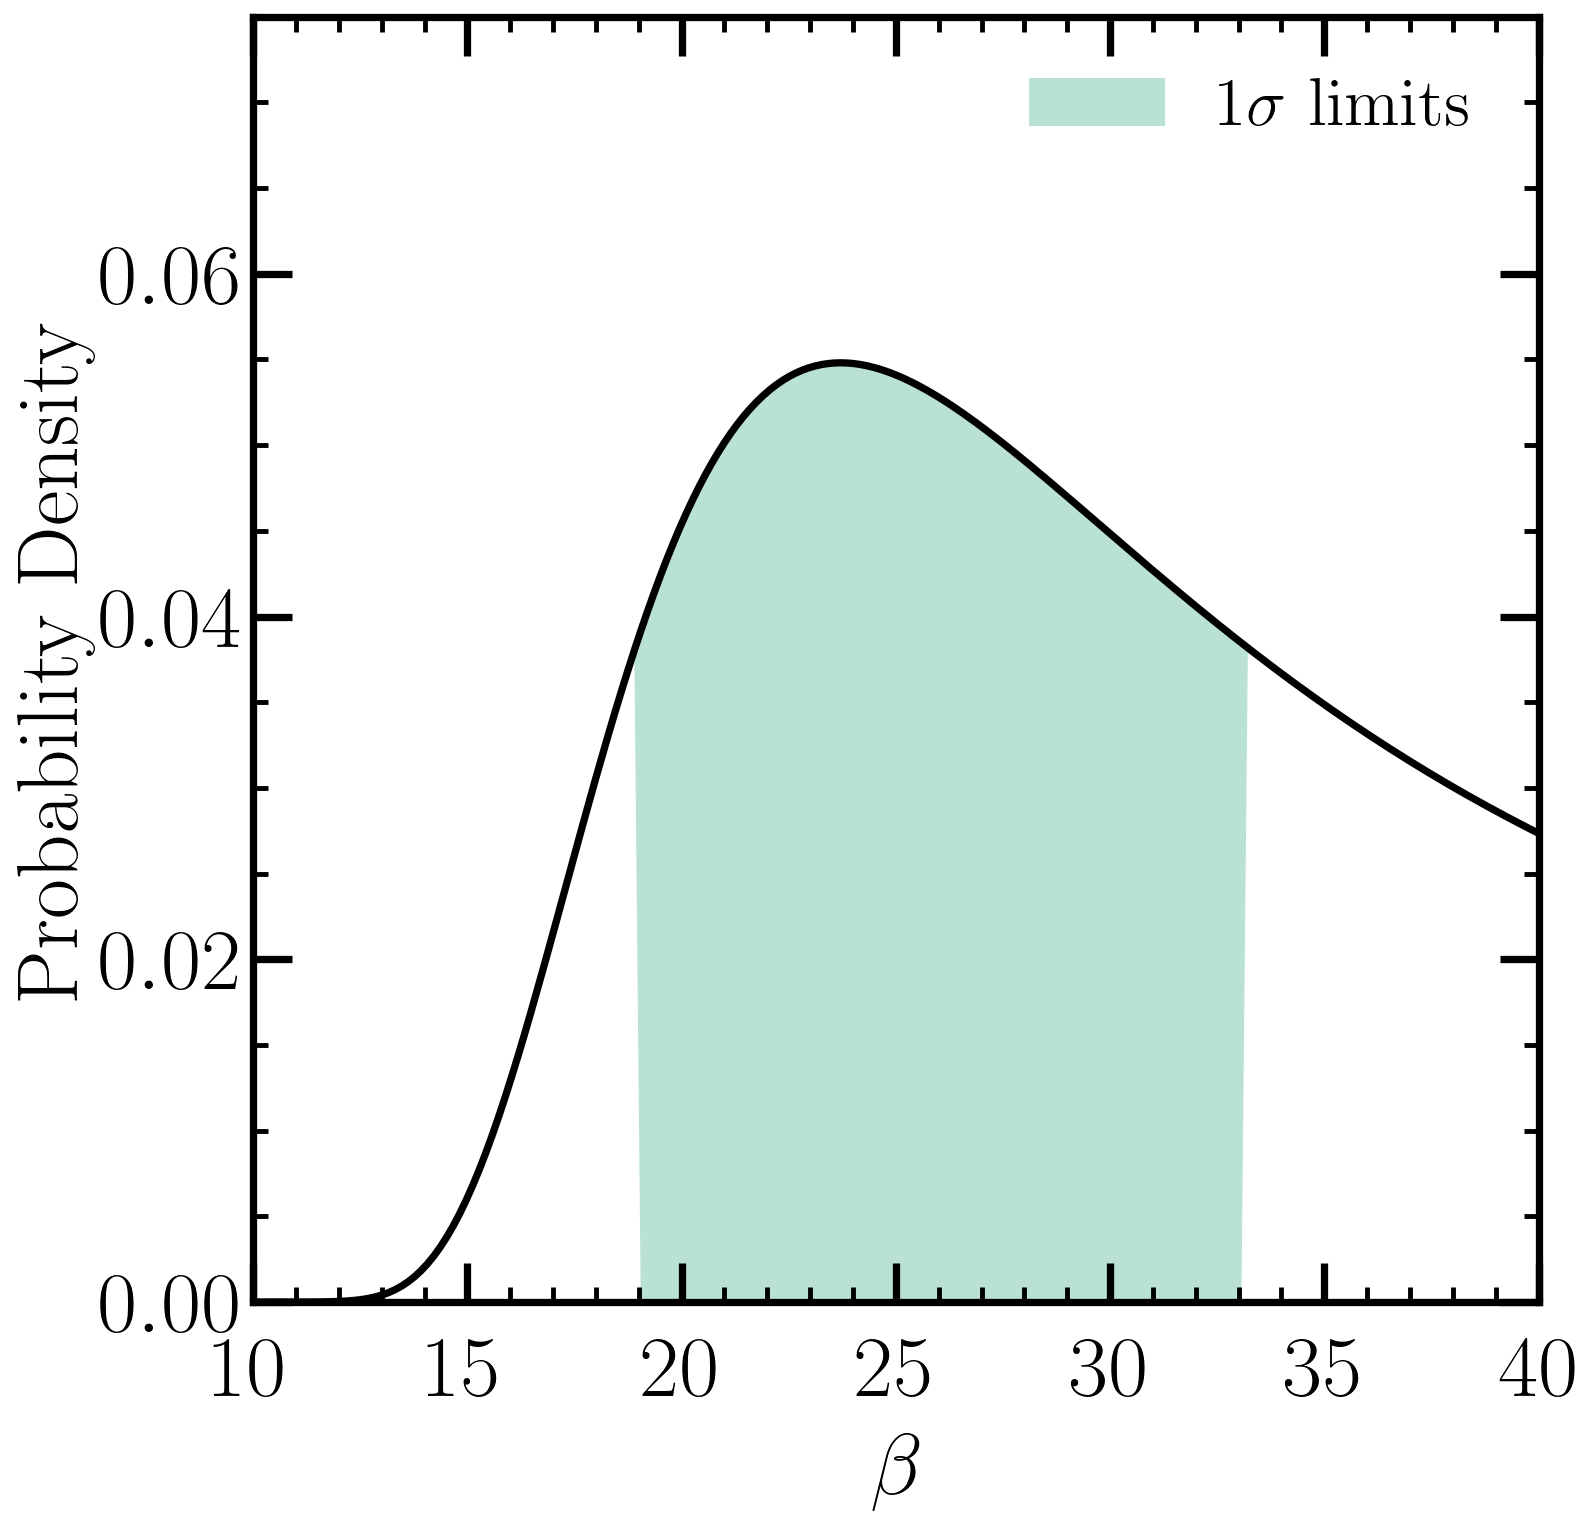

beta = 23.71859 - 4.67337/ + 9.19598


In [ ]:
best_fit_beta, beta_low_bound, beta_high_bound = sLMAO.fitBeta('fit_day.csv', generate=False, show=True)

In [17]:
lines = inspect.getsource(sLMAO.fitBeta)
print(lines)

def fitBeta(filename, generate=True, show=True):
    """
    Performs a fit for beta, the neutrino production zone parameter, given the observed spectrum
    of scattered electron in Super-K.
    
        Parameters:
            filename (string): Location + name of the fit results to be stored/extracted, relative to
                               the home directory of this repository.
    
            generate (boolean): Whether or not to generate a new fit. Set to True (default) to generate a new
                                fit or overwrite an existing fit. Set to False to get an already existing fit.
    
            show (boolean): Whether or not to plot the fit results. Set to True (default) to create and save a
                            plot. Plot saves to the "figures/"" directory. Set to False to do nothing.
    
        Regardless of the values of the above booleans, this function will grab a fit result from file and
        return the primary characteristics of the fit.

# Looking at the fitted-$\beta$ production zone

In [18]:
upper_beta = best_fit_beta + beta_high_bound
lower_beta = best_fit_beta - beta_low_bound

best_fit_zone = sLMAO.generate_production_zone(best_fit_beta)
upper_fit_zone = sLMAO.generate_production_zone(upper_beta)
lower_fit_zone = sLMAO.generate_production_zone(lower_beta)

In [19]:
df_8B = sLMAO.get8BProductionZone('data/8BZone.csv')
SSM_r = df_8B['Radius']
SSM_8B_zone = 4*np.pi*df_8B['Rate']

norm_8B = sp.integrate.simpson(SSM_8B_zone,SSM_r)

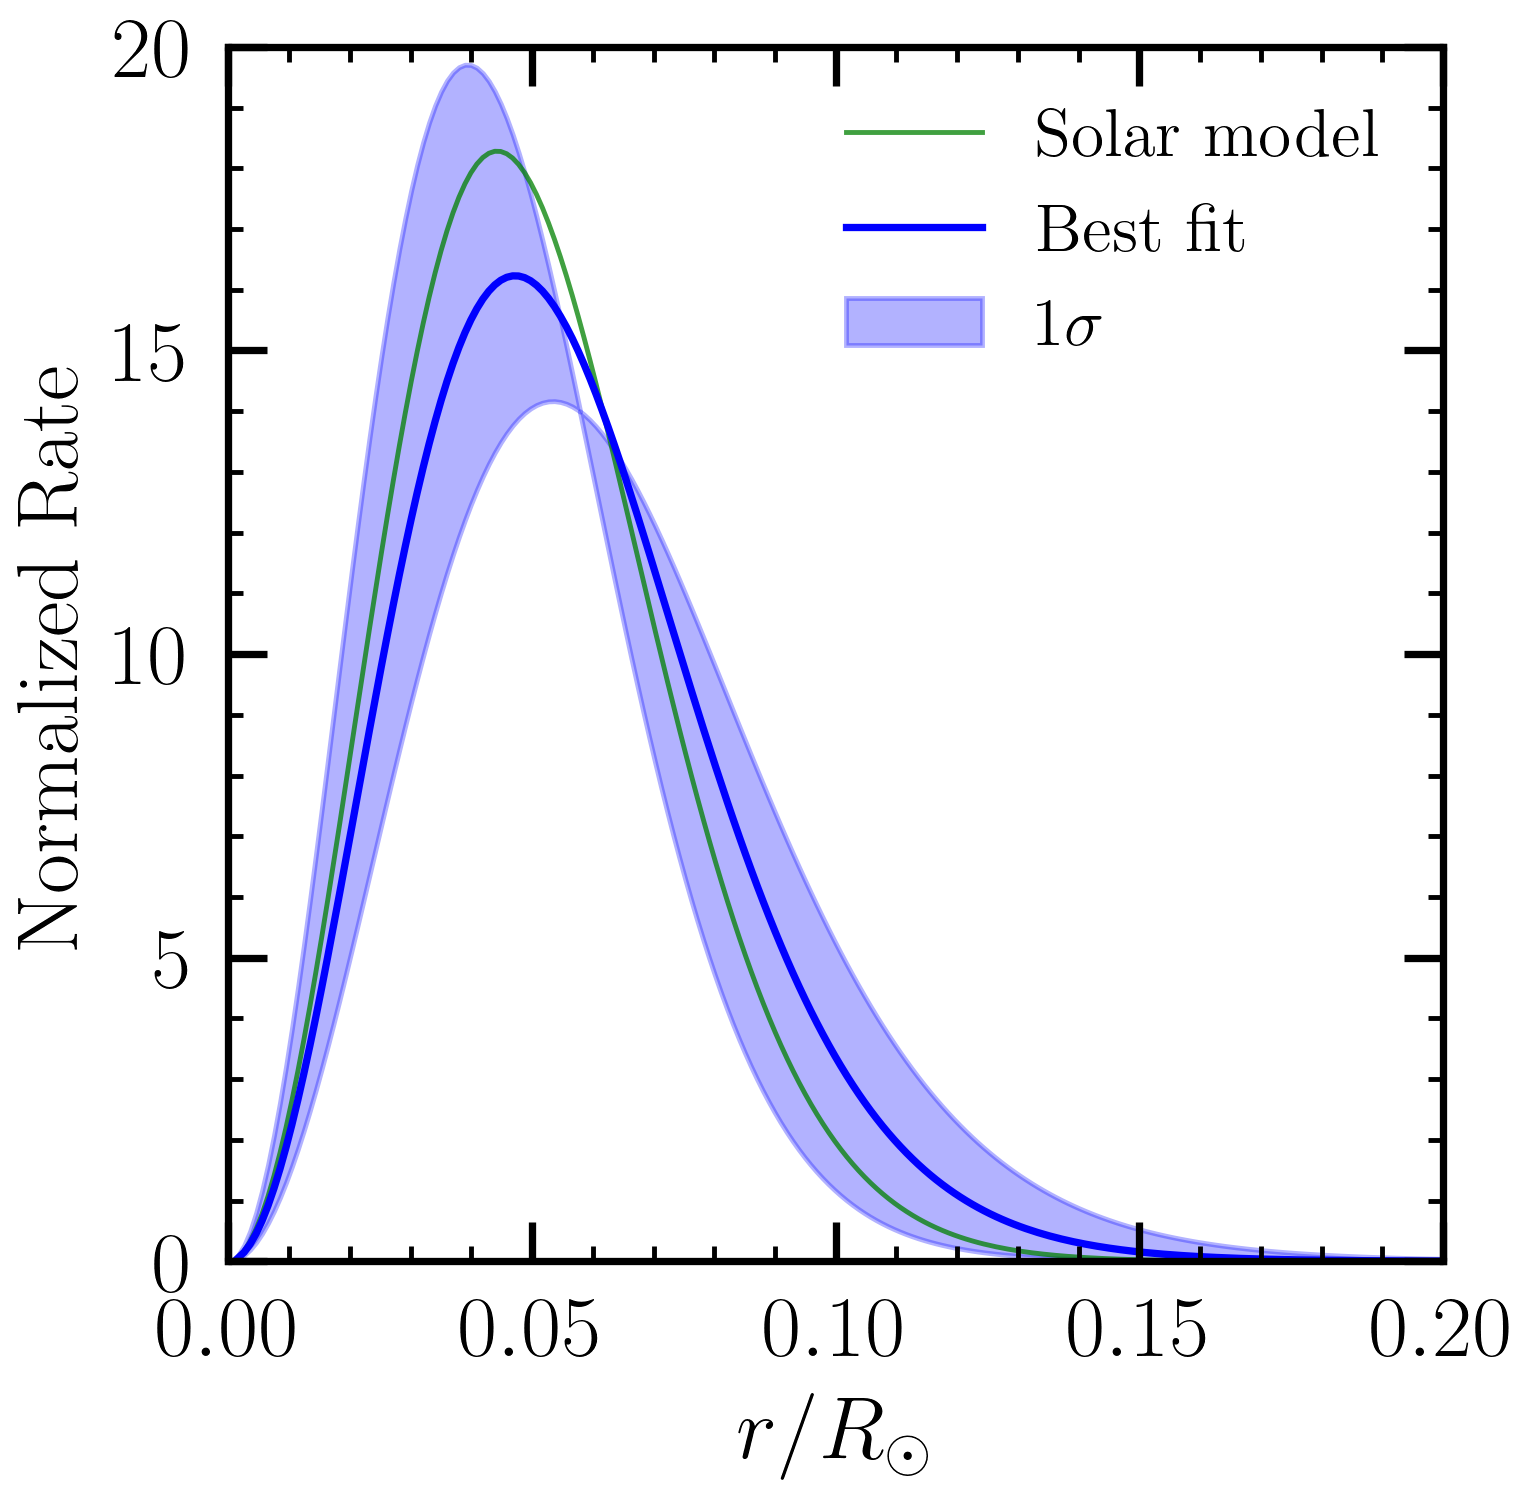

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax.set_xlabel(r'$r/R_\odot$')
ax.set_ylabel(r'Normalized Rate')
ax.plot(SSM_r,SSM_8B_zone/norm_8B,ls='solid',color='green',label='Solar model',lw=1,alpha=0.75)
ax.plot(SSM_r,best_fit_zone(SSM_r),lw=1.5,label=r'Best fit',ls='solid',color='blue')

y1 = lower_fit_zone(SSM_r)
y2 = upper_fit_zone(SSM_r)
ax.fill_between(SSM_r, y1, y2, where=(y1 >= y2), interpolate=True, color='blue', alpha=0.3, label=r'$1 \sigma$')
ax.fill_between(SSM_r, y1, y2, where=(y1 < y2), interpolate=True, color='blue', alpha=0.3)

ax.set_xlim(0,0.2)
ax.set_ylim(0,20)
ax.tick_params(axis='both', pad=7)
ax.legend(fontsize=14)
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig('figures/fitComparison.pdf')
plt.show()

## Where are 68% of neutrinos produced within the best-fit zone?

In [21]:
r_peak, r_low_bound, r_high_bound = sLMAO.determineNuProductionExtent(best_fit_beta)

r = 0.04680 - 0.02063/ + 0.02653


# Plot of constraints on the Solar $\rho T$ plane

In [22]:
import matplotlib.patches as patches

In [23]:
r_center = r_peak
r_min = r_center - r_low_bound
r_max = r_center + r_high_bound

print("Peak of neutrino production: r =", r_center)
print("-1sigma minimum of neutrino production: r =",r_min)
print("+1sigma maximum of neutrino production: r =",r_max)

Peak of neutrino production: r = 0.0468028128128128
-1sigma minimum of neutrino production: r = 0.0261713113113113
+1sigma maximum of neutrino production: r = 0.073329029029029


In [24]:
r_to_t = sp.interpolate.interp1d(sLMAO.SSM_r,sLMAO.SSM_T)
r_to_rho = sp.interpolate.interp1d(sLMAO.SSM_r,sLMAO.SSM_rho)

func_temperature = sp.interpolate.interp1d(sLMAO.SSM_r,sLMAO.SSM_T)
func_density = sp.interpolate.interp1d(sLMAO.SSM_r,sLMAO.SSM_rho)

In [25]:
profile_peak_density = func_density(r_center)
profile_min_density = func_density(r_min)
profile_max_density = func_density(r_max)

print("Density Contraint:")
print("Density ranges from",profile_min_density,'to',profile_max_density,'g cm^{-3} with rho =',profile_peak_density,'g cm^{-3} at the peak of the production profile.')
print('Or,',profile_peak_density,'^{+',profile_min_density-profile_peak_density,'}_{-',profile_peak_density-profile_max_density,'} g cm^{-3}.')

Density Contraint:
Density ranges from 143.4987473503718 to 107.9636568076413 g cm^{-3} with rho = 129.6163178627259 g cm^{-3} at the peak of the production profile.
Or, 129.6163178627259 ^{+ 13.88242948764588 }_{- 21.652661055084607 } g cm^{-3}.


In [26]:
phi = sLMAO.phi_tot_8B/(1e6 * u.cm**-2 * u.s**-1)
delta_phi = np.sqrt(0.16**2 + 0.12**2)
print('delta_phi/phi = {0:.3f}'.format(delta_phi/phi))

T_c = r_to_t(r_center)
delta_T = (delta_phi/phi)*T_c/24
print(u'Temperature Constraint: ({0:.5f} \u00B1 {1:.5f}) \u00D7 10^7 K'.format(T_c/1e7,delta_T/1e7))

delta_phi/phi = 0.038
Temperature Constraint: (1.48044 ± 0.00235) × 10^7 K


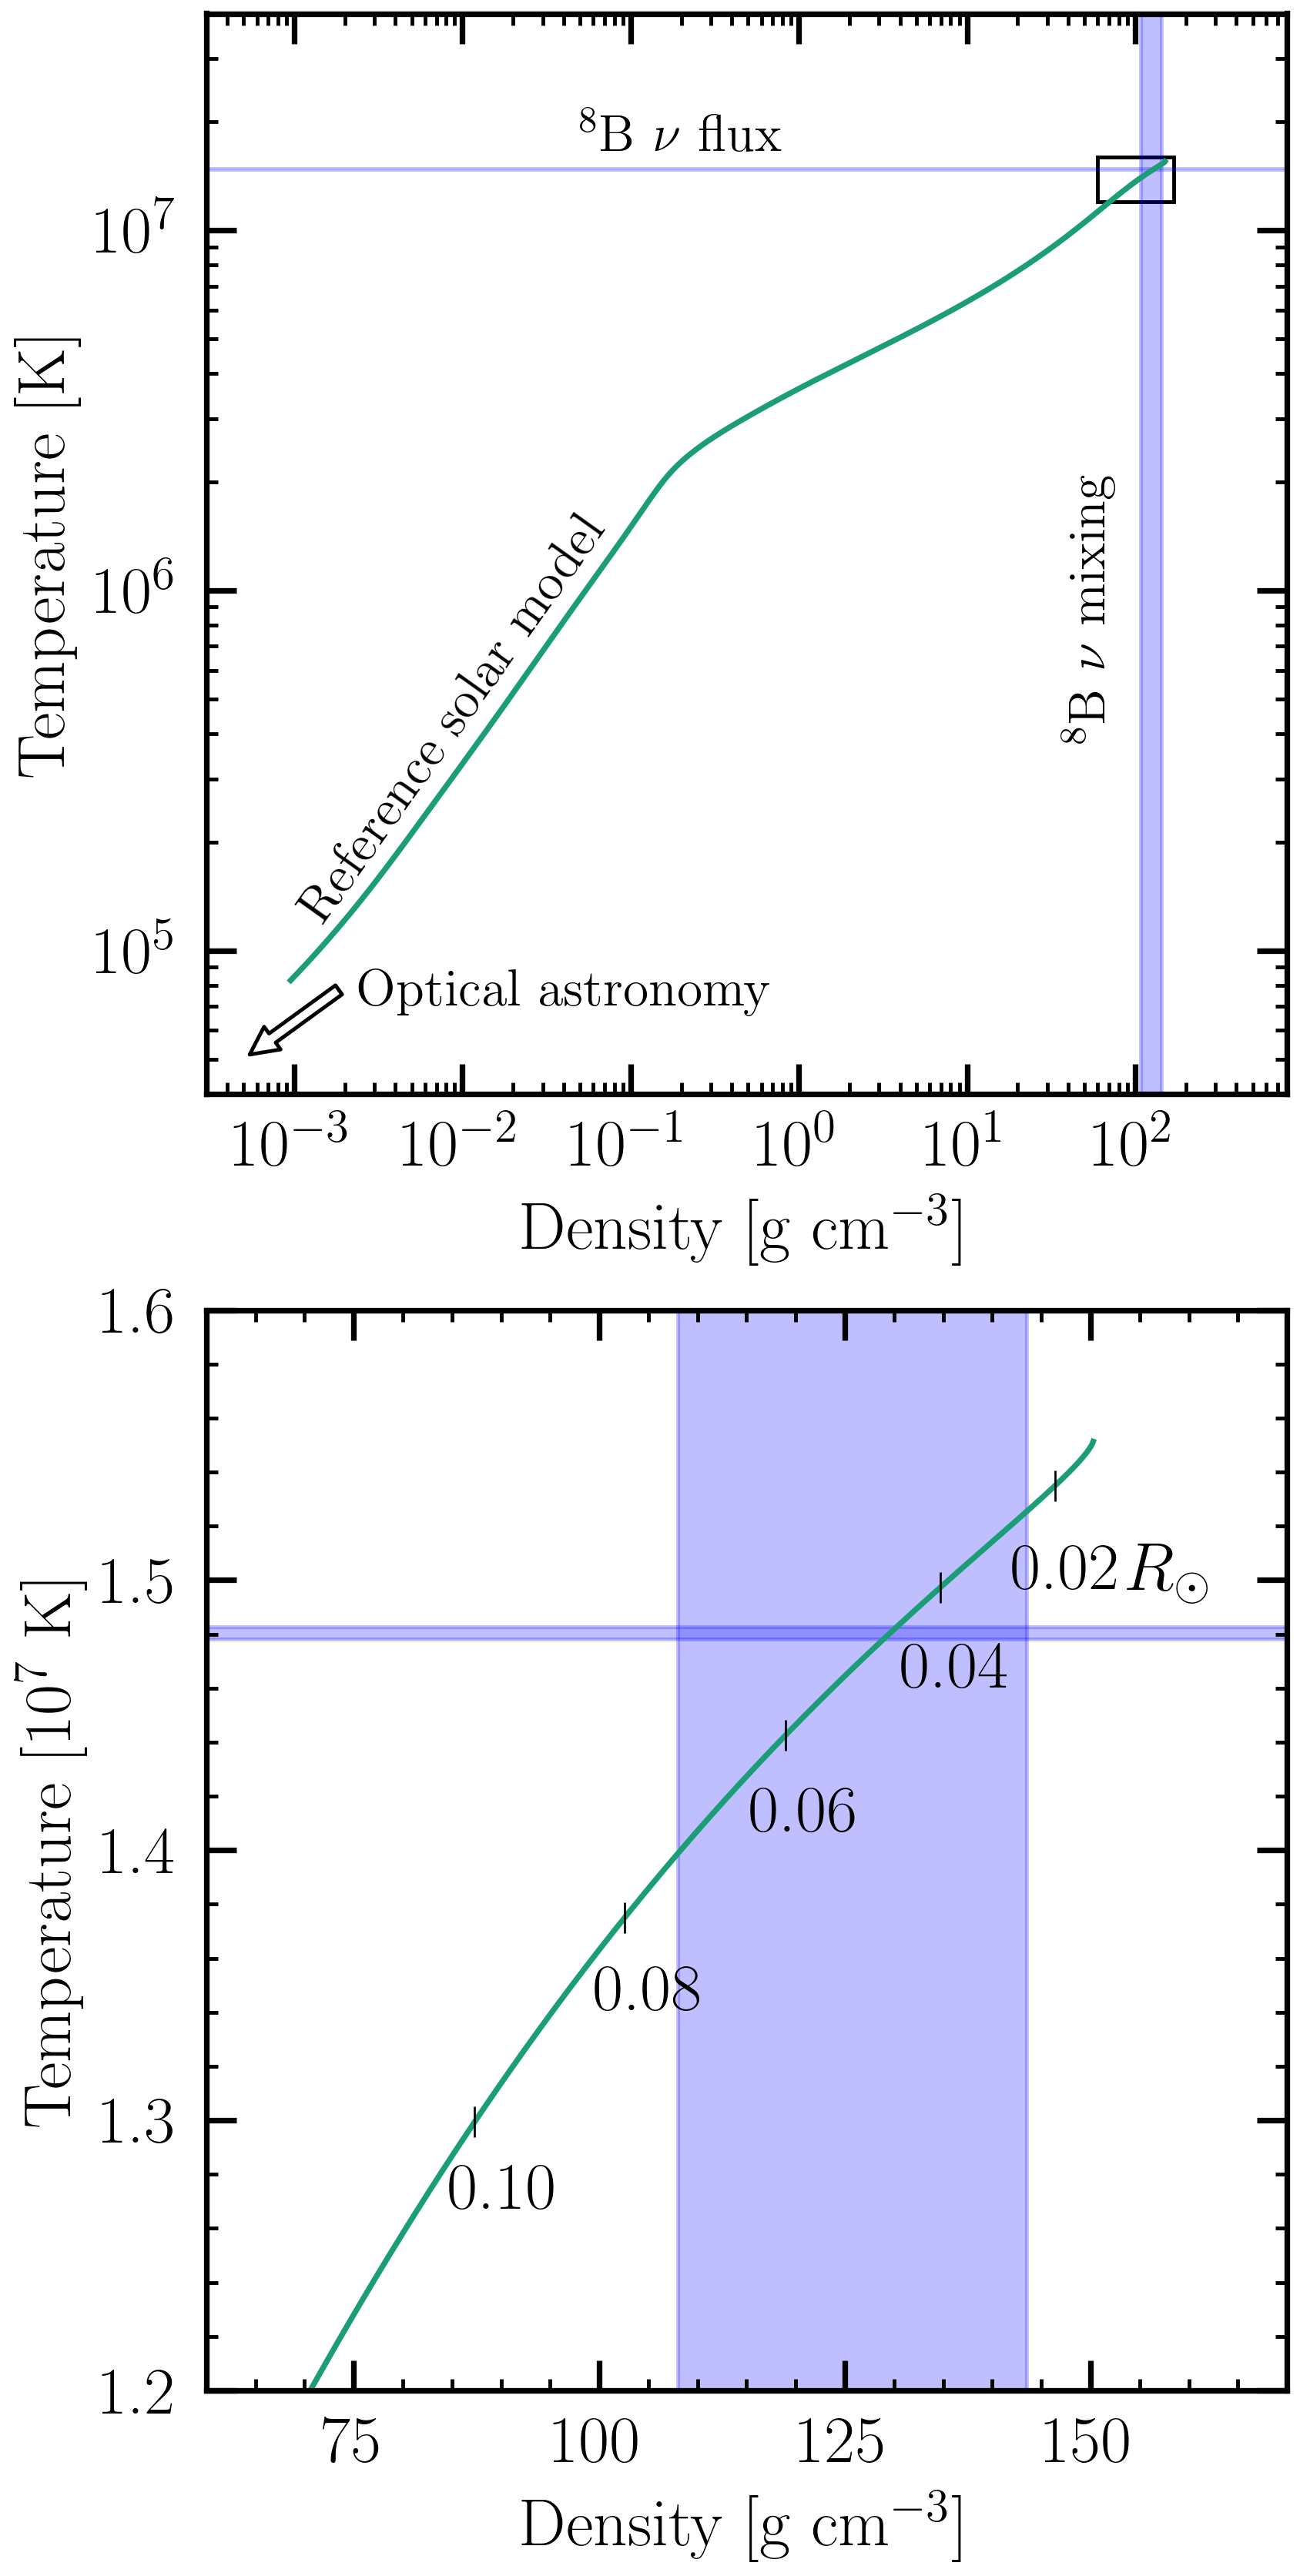

In [27]:
bar_color = "blue"
bar_shading = 0.25

fig, axs = plt.subplots(2, 1, figsize=(1.1*figsize, 2*figsize),dpi=dpi)
ax = axs[0]
ax.plot(sLMAO.SSM_rho,sLMAO.SSM_T,label='Reference solar model',lw=1.5,zorder=5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'Density [g cm$^{-3}$]')
ax.set_ylabel(r'Temperature [K]')
ax.axvspan(func_density(r_min),func_density(r_max),color=bar_color,alpha=bar_shading,zorder=2)
ax.axhspan(func_temperature(r_center)-delta_T,func_temperature(r_center)+delta_T,color=bar_color,alpha=bar_shading,label=r'$^8$B constraints',zorder=2)
ax.set_xlim(3e-4,800)
ax.set_ylim(4e4,4e7)

ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100))
ax.xaxis.set_major_formatter(LogFormatterSciNotation())
ax.tick_params(axis='both', pad=7)

xmin0, xmax0 = ax.get_xlim()
ymin0, ymax0 = ax.get_ylim()

#ax.legend(loc='lower center',fontsize=14)
ax.text(1e-3,1.2e5,'Reference solar model',rotation=54.5,fontsize=14)
ax.text(5e-2,1.65e7,r'$^8$B $\nu$ flux',fontsize=14)
ax.text(37,4e5,r'$^8$B $\nu$ mixing',rotation=90,fontsize=14)

#Define the arrow
start = (2e-3, 8e4)
end = (5e-4, 5e4)
arrow = patches.FancyArrowPatch(start, end, mutation_scale=15, color='k',fc='white')
ax.add_patch(arrow)
ax.text(2.4e-3,7e4,'Optical astronomy',fontsize=14)

ax.set_box_aspect(1)

ax = axs[1]
ax.plot(sLMAO.SSM_rho,sLMAO.SSM_T,lw=1.5,zorder=2.5)

fractions = [0.02,0.04,0.06,0.08,0.10]
for frac in fractions:
    ax.scatter(r_to_rho(frac),r_to_t(frac),color='k',s=70,zorder=6,marker='|')
    ax.text(0.97*r_to_rho(frac),r_to_t(frac)*0.975,'{:.2f}'.format(frac),zorder=6)

ax.text(1.05*r_to_rho(0.02),r_to_t(0.02)*0.975,r'$R_\odot$')
ax.set_xlabel(r'Density [g cm$^{-3}$]')
ax.set_ylabel(r'Temperature [$10^7$ K]')
ax.axvspan(func_density(r_min),func_density(r_max),color=bar_color,alpha=bar_shading,zorder=2)
ax.axhspan(func_temperature(r_center)-delta_T,func_temperature(r_center)+delta_T,color=bar_color,alpha=bar_shading,label=r'$^8$B constraints',zorder=2)

ax.set_xlim(60,170)
ax.set_ylim(1.2e7,1.6e7)
ax.set_yticks([1.2e7,1.3e7,1.4e7,1.5e7,1.6e7],['1.2','1.3','1.4','1.5','1.6'])
ax.tick_params(axis='both', pad=7)

xmin1, xmax1 = ax.get_xlim()
ymin1, ymax1 = ax.get_ylim()

rect = Rectangle((xmin1, ymin1), 
                 xmax1 - xmin1, 
                 ymax1 - ymin1, 
                 edgecolor='black', facecolor='none', linewidth=1)

axs[0].add_patch(rect)
plt.tight_layout()
ax.set_box_aspect(1)
plt.subplots_adjust(wspace=0, hspace=0.2)
fig.savefig('figures/mainResult.pdf')
plt.show()